In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20201213_generator,
    explored_models_20201213_2_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [2]:
import pandas as pd

In [3]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
assert cc_max_all_neurons.shape == (79,)

In [4]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201213+20201213_2', 'main.pkl')
if not exists(f_main_result):
    makedirs(dirname(f_main_result), exist_ok=True)
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
        'multi_path': True,
        'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201213_generator(with_source=True, separate_bn_list=[True]),
            explored_models_20201213_2_generator(with_source=True, separate_bn_list=[True]),
        ),
        total_num_param=29,
        train_size_mapping={
            None: 5120,
        },
        no_missing_data=False,
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=79,
        skip_eval_json=True,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400


In [5]:
df_main_result

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          geD1            2         16          2           cm-last      5120              0.642350   
                                                                                                     inst-last    5120              0.645303   
                                                                                         3           cm-last      5120              0.651910   
                                                                                                     inst-last    5120              0.639881   
                                                                                         4           cm-last      5120              0.646416   
...                                                                                                                                      ...   
softplus True                 poisson   1          leD6            2         32          7           inst-last    5120                   NaN   
                                                   leD7            2         16          7           cm-last      5120              0.649993   
                                                                                                     inst-last    5120              0.625185   
                                                                             32          7           cm-last      5120                   NaN   
                                                                                                     inst-last    5120                   NaN   

                                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          geD1            2         16          2           cm-last      5120           0.296313   
                                                                                                     inst-last    5120           0.297253   
                                                                                         3           cm-last      5120           0.300677   
                                                                                                     inst-last    5120           0.295232   
                                                                                         4           cm-last      5120           0.298171   
...                                                                                                                                   ...   
softplus True                 poisson   1          leD6            2         32          7           inst-last    5120                NaN   
                                                   leD7            2         16          7           cm-last      5120           0.298753   
                                                                                                     inst-last    5120           0.288450   
                                                                             32          7           cm-last      5120                NaN   
                                                                                                     inst-last    5120                NaN   

                                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          geD1            2         16          2           cm-last      5120          0.526873   

In [6]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          geD1            2         16          2           cm-last      5120              0.642350   
                                                                                                     inst-last    5120              0.645303   
                                                                                         3           cm-last      5120              0.651910   
                                                                                                     inst-last    5120              0.639881   
                                                                                         4           cm-last      5120              0.646416   
...                                                                                                                                      ...   
softplus True                 poisson   1          leD6            2         16          7           inst-last    5120              0.646671   
                                                                             32          6           cm-last      5120              0.677320   
                                                                                                     inst-last    5120              0.672369   
                                                   leD7            2         16          7           cm-last      5120              0.649993   
                                                                                                     inst-last    5120              0.625185   

                                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          geD1            2         16          2           cm-last      5120           0.296313   
                                                                                                     inst-last    5120           0.297253   
                                                                                         3           cm-last      5120           0.300677   
                                                                                                     inst-last    5120           0.295232   
                                                                                         4           cm-last      5120           0.298171   
...                                                                                                                                   ...   
softplus True                 poisson   1          leD6            2         16          7           inst-last    5120           0.297962   
                                                                             32          6           cm-last      5120           0.311663   
                                                                                                     inst-last    5120           0.309949   
                                                   leD7            2         16          7           cm-last      5120           0.298753   
                                                                                                     inst-last    5120           0.288450   

                                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          geD1            2         16          2           cm-last      5120          0.526873   

In [7]:
df_main_result_original = df_main_result.dropna().xs('geD1', level='multi_path_hack')

In [8]:
df_main_result_original

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         16          2           cm-last      5120              0.642350   
                                                                                     inst-last    5120              0.645303   
                                                                         3           cm-last      5120              0.651910   
                                                                                     inst-last    5120              0.639881   
                                                                         4           cm-last      5120              0.646416   
...                                                                                                                      ...   
softplus True                 poisson   1          2         32          4           inst-last    5120              0.673146   
                                                                         5           cm-last      5120              0.679111   
                                                                                     inst-last    5120              0.675554   
                                                                         6           cm-last      5120              0.677320   
                                                                                     inst-last    5120              0.672369   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         16          2           cm-last      5120           0.296313   
                                                                                     inst-last    5120           0.297253   
                                                                         3           cm-last      5120           0.300677   
                                                                                     inst-last    5120           0.295232   
                                                                         4           cm-last      5120           0.298171   
...                                                                                                                   ...   
softplus True                 poisson   1          2         32          4           inst-last    5120           0.310065   
                                                                         5           cm-last      5120           0.312785   
                                                                                     inst-last    5120           0.311462   
                                                                         6           cm-last      5120           0.311663   
                                                                                     inst-last    5120           0.309949   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         16          2           cm-last      5120          0.526873   
                                                                                     inst-last    5120          0.528345   
                                                                         3           cm-last      5120          0.531121   
                                                                                     inst-last    5120          0.524529   
                                                                         4 

In [9]:
# take main results and compare
f_ref_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_ref = pd.read_pickle(f_ref_result)

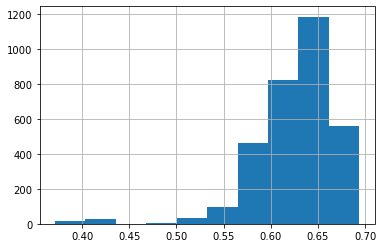

In [10]:
df_main_result_ref.xs(5120, level='train_keep')['cc2_normed_avg'].hist()

In [11]:
aaaa = df_main_result_ref.join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

from scipy.stats import pearsonr, spearmanr

In [13]:
# try to replicate results in 
# 20201114_collect-separatebn.ipynb
# and
# 20201118_collect-separatebn.ipynb
def compute_correlations():
    # 5120
    plt.close('all')
    fig, axes = plt.subplots(nrows=1, ncols=4, squeeze=True, figsize=(20, 6), sharex=True, sharey=True)
    axes = axes.ravel()
    aaaaaa = aaaa.xs(5120, level='train_keep')
    idx_ax = -1
    for idx1, train_keep in enumerate(aaaaaa.index.get_level_values('out_channel').unique()):
        bbb = aaaaaa.xs(train_keep, level='out_channel')
        for idx2, num_layer in enumerate(bbb.index.get_level_values('num_layer').unique()):
            bb = bbb.xs(num_layer, level='num_layer')
            for idx3, readout_type in enumerate( bb.index.get_level_values('readout_type').unique()):
                idx_ax += 1
                ax = axes[idx_ax]
                b = bb.xs(readout_type, level='readout_type')
                n = b.shape[0]
                r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                r_spearman = spearmanr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                           label='ch {}, num_l {}, {}, n={}, r={:.2f}/{:.2f}'.format(
                               train_keep, num_layer, readout_type, n, r, r_spearman
                           )
                          )
                
                ax.set_xlabel('ref')
                ax.set_ylabel('new')
                ax.plot([0.5,0.75],[0.5,0.75],linestyle='--',color='k')
                ax.legend()

                # compute pearson
                print(train_keep, num_layer, readout_type)
        
        
    
    plt.show()

In [14]:
# take results from 
# 20201114_collect-separatebn.ipynb and 20201118_collect-separatebn.ipynb
# and compare
df_main_result_ref2 = pd.concat(
    [
        pd.read_pickle(join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201118', 'main_result_separatebn.pkl')),
        pd.read_pickle(join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201114', 'main_result_separatebn.pkl')),
    ], axis=0
).dropna()
     

In [15]:
df_main_result_ref2

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       1280              0.379478   
                                                                                                  2560              0.543094   
                                                                                                  5120              0.580530   
                                                                                     cm-last      1280              0.401936   
                                                                                                  2560              0.573986   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560              0.637329   
                                                                                                  5120              0.679273   
                                                                                     inst-last    1280              0.414699   
                                                                                                  2560              0.594899   
                                                                                                  5120              0.667413   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           cm-avg       1280           0.181373   
                                                                                                  2560           0.253170   
                                                                                                  5120           0.268277   
                                                                                     cm-last      1280           0.192658   
                                                                                                  2560           0.267190   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560           0.294164   
                                                                                                  5120           0.312190   
                                                                                     inst-last    1280           0.197021   
                                                                                                  2560           0.276591   
                                                                                                  5120           0.307430   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           cm-avg       1280          0.389241   
                                                                                                  2560          0.481323   
                                                                                                  5120          0.498672   
                                                                                     cm-last      1280          0.407067   
                                                                           

In [16]:
aaaa = df_main_result_ref2.join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

In [17]:
aaaa

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
softplus True                 poisson   0          2         32          3           cm-last      5120                  0.671486   
         False                mse       1          2         32          2           cm-last      5120                  0.632313   
         True                 poisson   1          2         32          6           inst-last    5120                  0.672369   
                                                             16          5           cm-last      5120                  0.651473   
                                                             32          4           cm-last      5120                  0.675658   
...                                                                                                                          ...   
         False                poisson   0          2         16          4           inst-last    5120                  0.652974   
                              mse       0          2         32          4           inst-last    5120                  0.642419   
relu     True                 mse       0          2         16          6           cm-last      5120                  0.643598   
softplus True                 poisson   0          2         16          2           cm-last      5120                  0.637358   
                                        1          2         32          2           cm-last      5120                  0.649985   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
softplus True                 poisson   0          2         32          3           cm-last      5120               0.308919   
         False                mse       1          2         32          2           cm-last      5120               0.290324   
         True                 poisson   1          2         32          6           inst-last    5120               0.309949   
                                                             16          5           cm-last      5120               0.299659   
                                                             32          4           cm-last      5120               0.310925   
...                                                                                                                       ...   
         False                poisson   0          2         16          4           inst-last    5120               0.300740   
                              mse       0          2         32          4           inst-last    5120               0.296380   
relu     True                 mse       0          2         16          6           cm-last      5120               0.296231   
softplus True                 poisson   0          2         16          2           cm-last      5120               0.293443   
                                        1          2         32          2           cm-last      5120               0.298489   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
softplus True                 poisson   0          2         32          3           cm-last      5120              0.539484   
         False                mse       1          2         32          2           cm-last      5120              0.522952   
         True                 poisson   1          2         32          6           inst-last    5120              0.539283   
                                                             16          5 

32 2 cm-last
32 2 inst-last
16 2 cm-last
16 2 inst-last


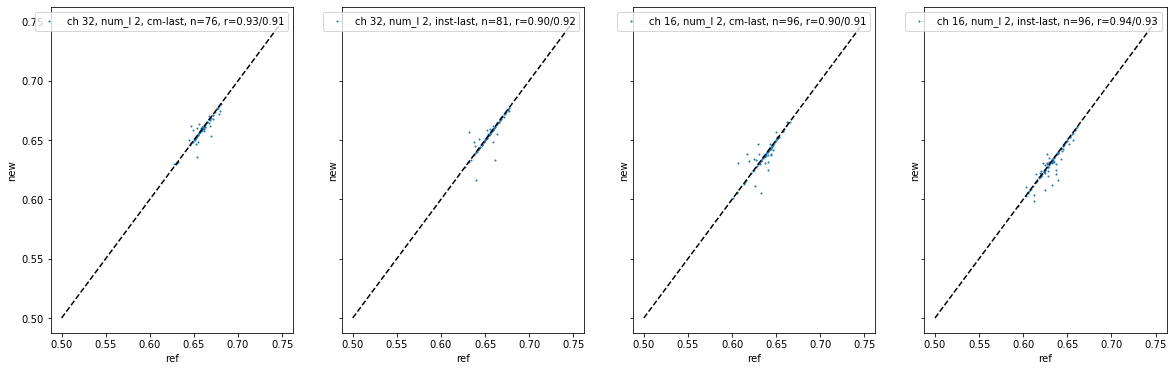

In [18]:
compute_correlations()
# card to card variation... interesting.

In [19]:
def collect_max_d_model():
    ret = df_main_result[
        df_main_result.index.get_level_values(
            'multi_path_hack'
            # here .values is important. otherwise this code does not work properly. not sure why.
            # pandas is complicated.
        ).map(lambda x: x.startswith('leD')).values & (
             df_main_result.index.get_level_values('multi_path_hack').map(lambda x: int(x[3:])) ==  df_main_result.index.get_level_values('rcnn_bl_cls')
        )
    ]
                                                                                             
    return ret.droplevel('multi_path_hack').dropna()

In [20]:
aaaa = collect_max_d_model().join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

32 2 cm-last
32 2 inst-last
16 2 cm-last
16 2 inst-last


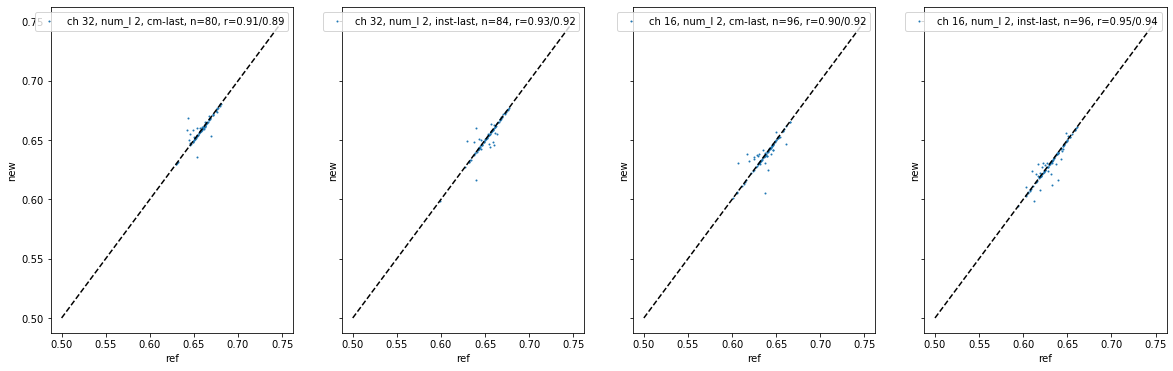

In [21]:
compute_correlations()
# card to card variations from geD1 to leDX. interesting.
# will use all available data from three sources as baseline.